In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    "CustomerID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "AnnualIncome": [15, 16, 17, 28, 30, 45, 55, 60, 65, 70],
    "SpendingScore": [39, 81, 6, 77, 40, 76, 6, 94, 3, 72],
    "Age": [19, 21, 20, 23, 24, 30, 32, 33, 35, 36],
}

In [3]:
df = pd.DataFrame(data)

In [4]:
df

,CustomerID,AnnualIncome,SpendingScore,Age
0,1,15,39,19
1,2,16,81,21
2,3,17,6,20
3,4,28,77,23
4,5,30,40,24
5,6,45,76,30
6,7,55,6,32
7,8,60,94,33
8,9,65,3,35
9,10,70,72,36


In [5]:
from sklearn.cluster import DBSCAN

In [6]:
from sklearn.preprocessing import StandardScaler  # <-- Import this FIRST

X = df[['AnnualIncome', 'SpendingScore']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\Avinash\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Avinash\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Avinash\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Avinash\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^

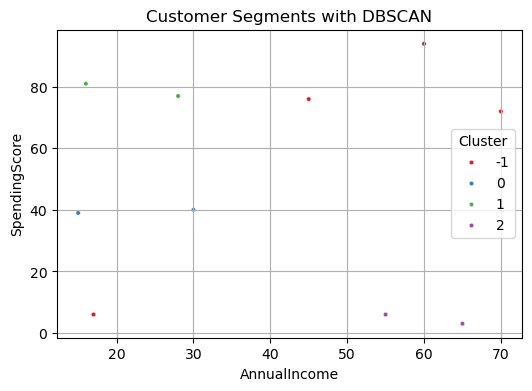

In [7]:
# Fit DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=2)
df['Cluster'] = dbscan.fit_predict(X_scaled)
# Plotting
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore', hue='Cluster', palette='Set1', s=10)
plt.title('Customer Segments with DBSCAN')
plt.grid(True)
plt.show()